In [5]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [6]:
def twoD_Gaussian_multicomp((x,y), amplitude1, xo1, yo1, sigma_x1, sigma_y1, theta1, offset1,
                           amplitude2, xo2, yo2, sigma_x2, sigma_y2, theta2, offset2):
    
    
    xo1 = float(xo1)
    yo1 = float(yo1)    
    a1 = (np.cos(theta1)**2)/(2*sigma_x1**2) + (np.sin(theta1)**2)/(2*sigma_y1**2)
    b1 = -(np.sin(2*theta1))/(4*sigma_x1**2) + (np.sin(2*theta1))/(4*sigma_y1**2)
    c1 = (np.sin(theta1)**2)/(2*sigma_x1**2) + (np.cos(theta1)**2)/(2*sigma_y1**2)
     
    g1 = offset1 + amplitude1*np.exp( - (a1*((x-xo1)**2) + 2*b1*(x-xo1)*(y-yo1) + c1*((y-yo1)**2)))
    
    
    xo2 = float(xo2)
    yo2 = float(yo2)    
    a2 = (np.cos(theta2)**2)/(2*sigma_x2**2) + (np.sin(theta2)**2)/(2*sigma_y2**2)
    b2 = -(np.sin(2*theta2))/(4*sigma_x2**2) + (np.sin(2*theta2))/(4*sigma_y2**2)
    c2 = (np.sin(theta2)**2)/(2*sigma_x2**2) + (np.cos(theta2)**2)/(2*sigma_y2**2)
     
    g2 = offset2 + amplitude2*np.exp( - (a2*((x-xo2)**2) + 2*b2*(x-xo2)*(y-yo2) + c2*((y-yo2)**2)))
    
    
    g = g1 + g2
    
    return g.ravel()

SyntaxError: invalid syntax (<ipython-input-6-73d0e1c4da5b>, line 1)

In [ ]:
file = open("test_image_2.txt", "r")
test_image = pickle.load(file)
file.close()

In [ ]:
plt.imshow(test_image)
print test_image.shape

In [ ]:
initial_guess = [800, 10, 45, 5, 25, 0, 0,
                500, 10, 120, 5, 10, 0, 0]
x = np.arange(0, 20)
y = np.arange(0, 178)
x,y = np.meshgrid(x, y)
popt, pcov = opt.curve_fit(twoD_Gaussian_multicomp, (x,y), test_image.flatten(), p0 = initial_guess)

In [3]:
data_fitted = twoD_Gaussian_multicomp((x, y), *popt)

fig, ax = plt.subplots(1, 1, figsize=(8,10))
ax.hold(True)
ax.imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=1000)
ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
plt.show()

NameError: name 'twoD_Gaussian_multicomp' is not defined

In [4]:
print (initial_guess-popt)/popt

NameError: name 'initial_guess' is not defined

In [9]:
print popt

[ 7.79138075e+02  9.39874807e+00  4.47662887e+01  1.86951306e+00
  1.78920193e+01  8.07464913e-04  2.87424508e+06  4.68534840e+02
  9.45824196e+00  1.27879220e+02  1.87350808e+00  6.86675099e+00
  5.81179627e-05 -2.87422065e+06]


In [10]:
print pcov.diagonal() / popt

[ 5.72629078e-03  2.72482727e-06  5.25247201e-05  1.48663127e-05
  1.42960703e-04  2.03049704e-04  1.16388700e+08  2.46893618e-02
  1.95570726e-05  1.94237789e-05  1.02641422e-04  3.73625330e-04
  9.04565211e-02 -1.16389688e+08]


C:\Users\kylew\anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kylew\anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  if __name__ == '__main__':
C:\Users\kylew\anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  app.launch_new_instance()


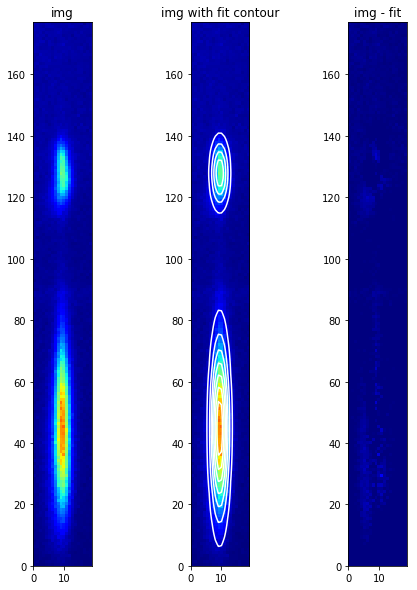

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(8,10))

ax[0].hold(True)
ax[0].imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=1000)
#ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[0].set_title("img")

ax[1].hold(True)
ax[1].imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=1000)
ax[1].contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[1].set_title("img with fit contour")


ax[2].hold(True)
ax[2].imshow(test_image.reshape(178, 20)-data_fitted.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=1000)
#ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[2].set_title("img - fit")
plt.show()

In [ ]:
(test_image.reshape(178, 20)-data_fitted.reshape(178, 20))